In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

**Датасет состоит из 150 строк, каждая строка это описание цветка ириса по 4 критериям: длина чашелистника, ширина чашелистника, длина лепестка, ширина лепестка. Нулевых знаений нет. Наблюдается высокая корреляция между длиной и шириной лепестка. Все ирисы делятся на три класса. Моя задача - проверить точность модели предсказания.**

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**Проверять буду на данных, содержащих только значения по чашелистнику.**

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data[['sepal length (cm)', 'sepal width (cm)']]
data['variety'] = iris.target

In [5]:
data

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


**Делю все данные на тренировочные и тестовые с помощью библиотеки sklearn.**

In [6]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [7]:
data_train

,sepal length (cm),sepal width (cm),variety
66,5.6,3.0,1
86,6.7,3.1,1
64,5.6,2.9,1
129,7.2,3.0,2
4,5.0,3.6,0
...,...,...,...
91,6.1,3.0,1
90,5.5,2.6,1
128,6.4,2.8,2
147,6.5,3.0,2


In [8]:
data_test

,sepal length (cm),sepal width (cm),variety
12,4.8,3.0,0
134,6.1,2.6,2
39,5.1,3.4,0
48,5.3,3.7,0
78,6.0,2.9,1
51,6.4,3.2,1
135,7.7,3.0,2
133,6.3,2.8,2
18,5.7,3.8,0
107,7.3,2.9,2


**Из тренировочных и тестовых данных удаляю столбец с классами, а затем импортирую метод для построения линейного дискриминантного анализа.**

In [9]:
y_train, y_test = data_train['variety'], data_test['variety']
del data_train['variety']
del data_test['variety']

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
lda = LinearDiscriminantAnalysis()

In [12]:
# обучение модели на тренировочных данных

lda.fit(data_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
# импорт метода подсчета точности предсказанных данных в сравнении с фактическими

from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, lda.predict(data_test))

0.7666666666666667

**Точность 76%, это соотношение всех верно предсказанных ответов на общее количество предсказанных.**

In [15]:
lda.coef_

array([[-6.13910507,  8.00962204],
       [ 1.56489663, -3.86313801],
       [ 4.18900836, -3.55284603]])

**Визуализация тестовой выборки и центров классов**

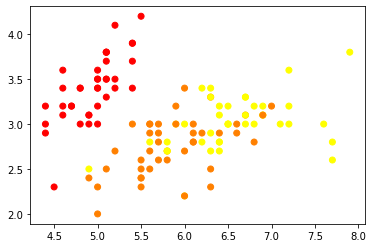

In [16]:
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train, cmap='autumn')
plt.show()

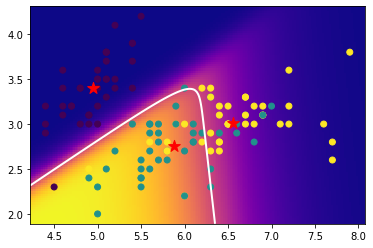

In [17]:
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='plasma',
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

In [18]:
import matplotlib.colors as mcolors

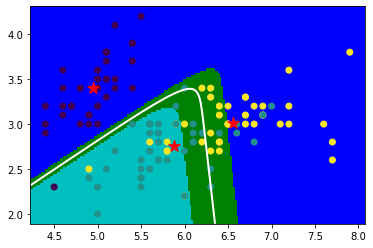

In [19]:
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=mcolors.ListedColormap(["b", "g", "c"]),
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

**Отброшу колонку variety и посмотрю, какое кол-во кластеров предложить модель.**

In [20]:
data_claster = data[['sepal length (cm)', 'sepal width (cm)']]
data_claster.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [21]:
X = data_claster.values

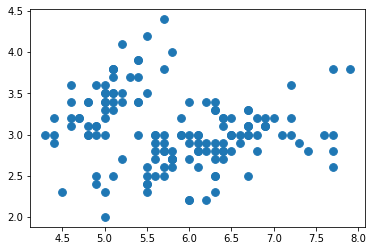

In [22]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

**Нормализация данных**

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_scaled = scaler.fit_transform(X)

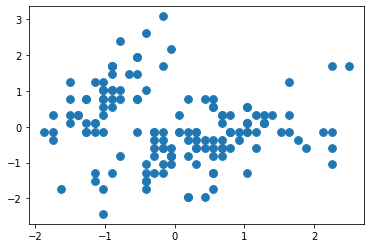

In [26]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

**С помощью метода локтя можно вычислить примерное количество кластеров. Замедление снижения функции происходит при значении по иксу 3, поэтому логично предположить, что кластеров 3.** 

In [27]:
from sklearn.cluster import KMeans

In [28]:
# метод локтя

k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

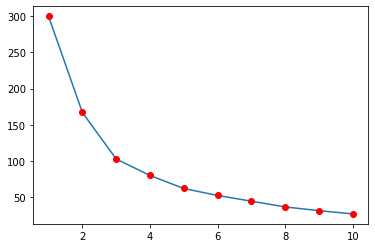

In [29]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [30]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

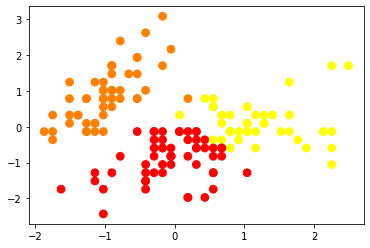

In [31]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

**По этой визуализации видно, что кластер, выделенный красным (0), аналогичен фактическому за исключением одной точки. А вот деление желтого и оранжевого кластеров (1 и 2) на нашем графике более четкое, что не соответствует факту. Если бы можно было посчитать, коэффициент lda, не думаю, что он был бы высок.**